In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline
import scipy.spatial.transform as transform

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [77]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = -5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=0, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.05, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, downstream_YAG, crystal2]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 359.9273925318916 microns
FWHM in y: 359.9273925318916 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4159771378605495
5.4159771378605495
b 1.00
b 0.61
b 1.00
b 0.61
1.638781390440549
14.869442602577836
24.868669308142298
after mr1l0: 0.00
after mr2l0: 0.00
after c2: 0.69
(array([-1.08102280e-05,  0.00000000e+00,  5.79840052e-06]), array([0.47267244, 0.        , 0.8812382 ]))
1.3620401788281523e-05


In [78]:
print(crystal2.d/np.sin(5*np.pi/180))

2.2030307131721484e-09


In [79]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0
0
0.030601379936325394
0.2595207313512979
0
0
0
0


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: -0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.79
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -61.29
zx: 972.14
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.14
zy: 365.36
azimuth 693.55 mrad


<IPython.core.display.Javascript object>


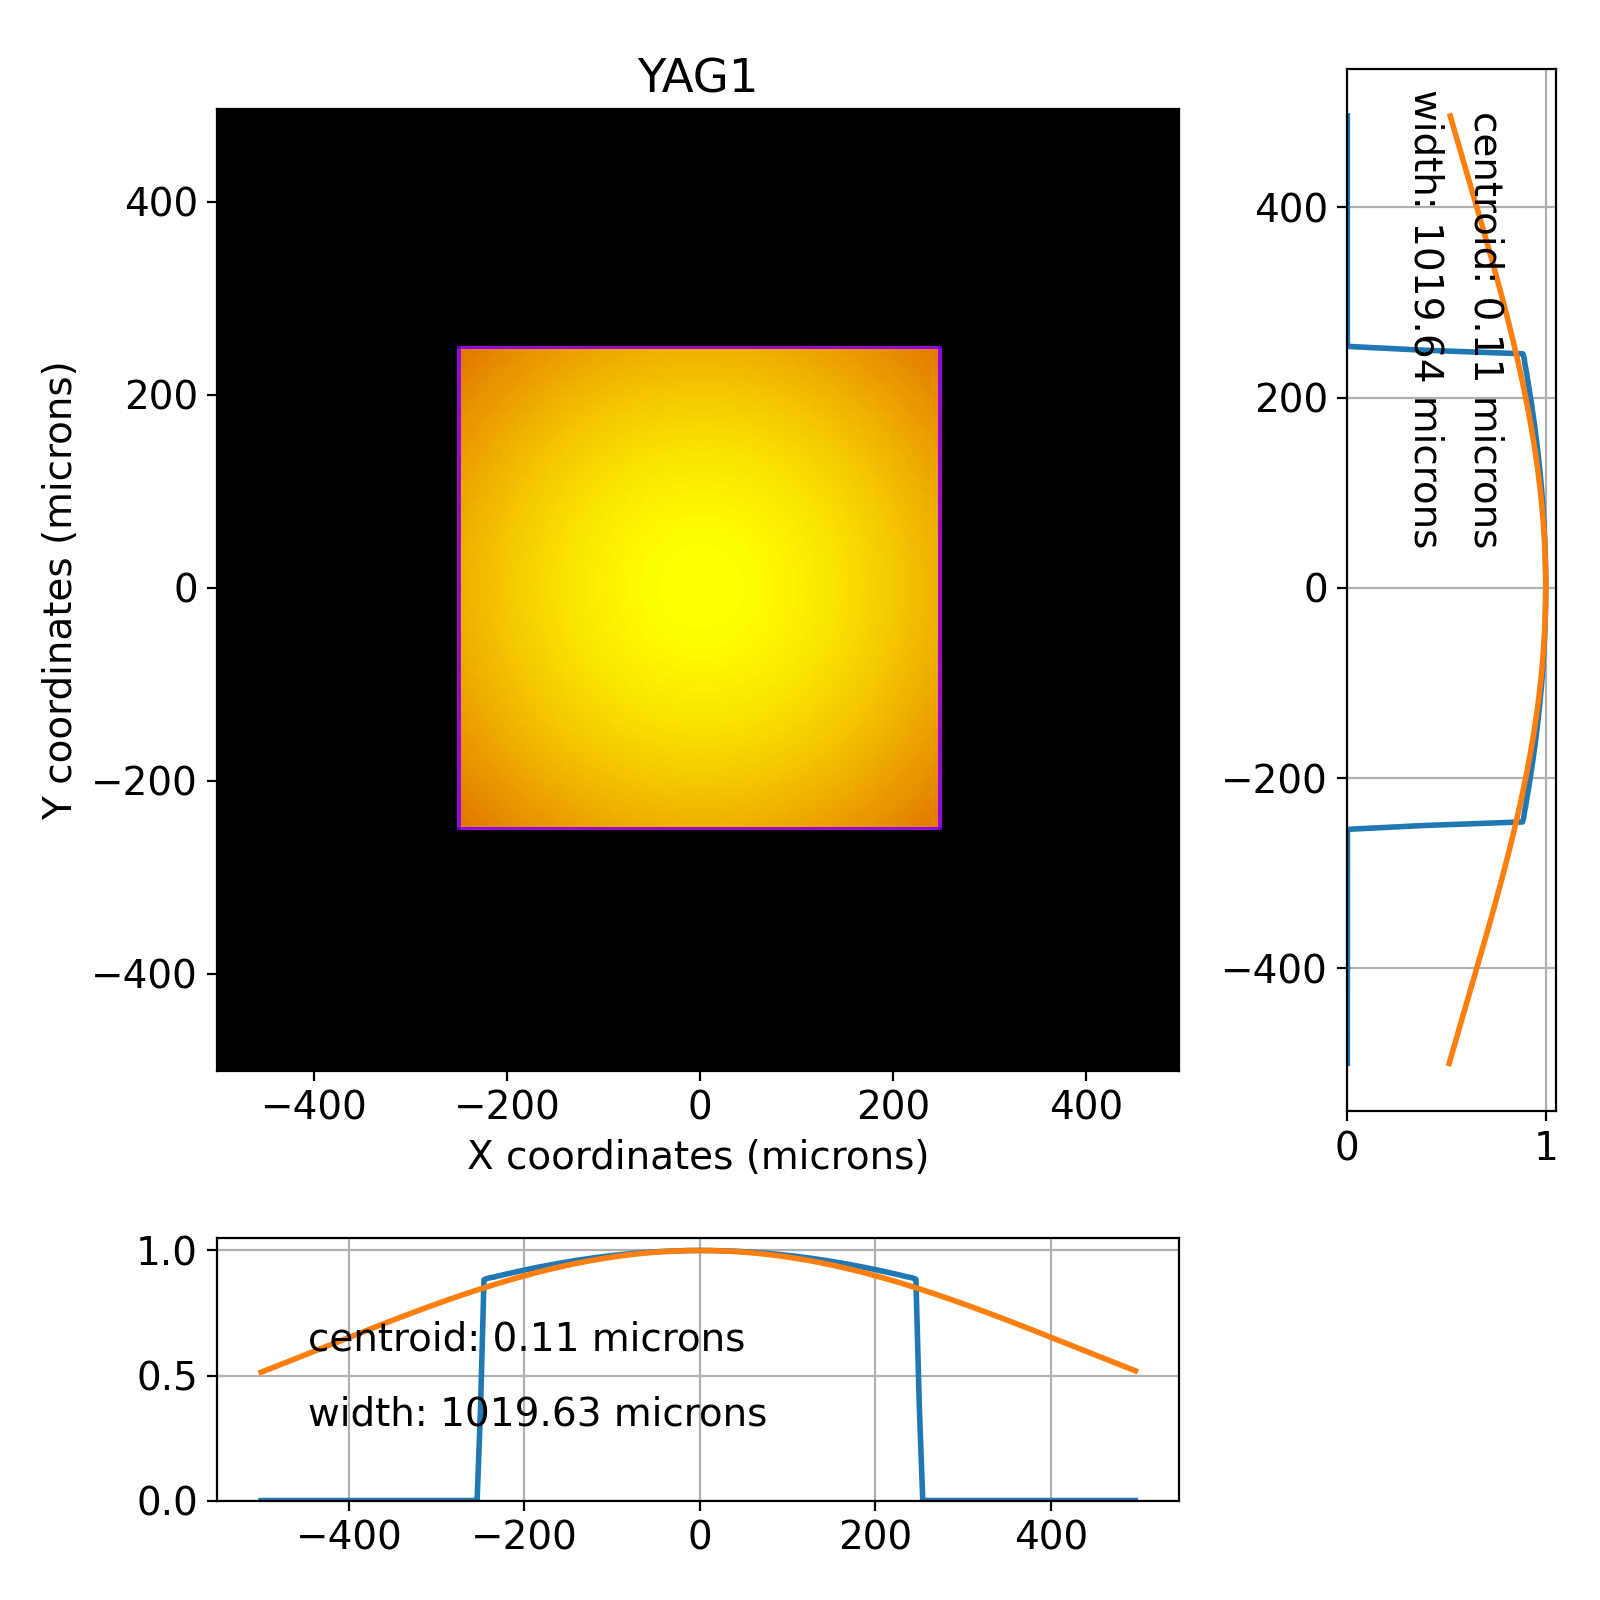

<IPython.core.display.Javascript object>


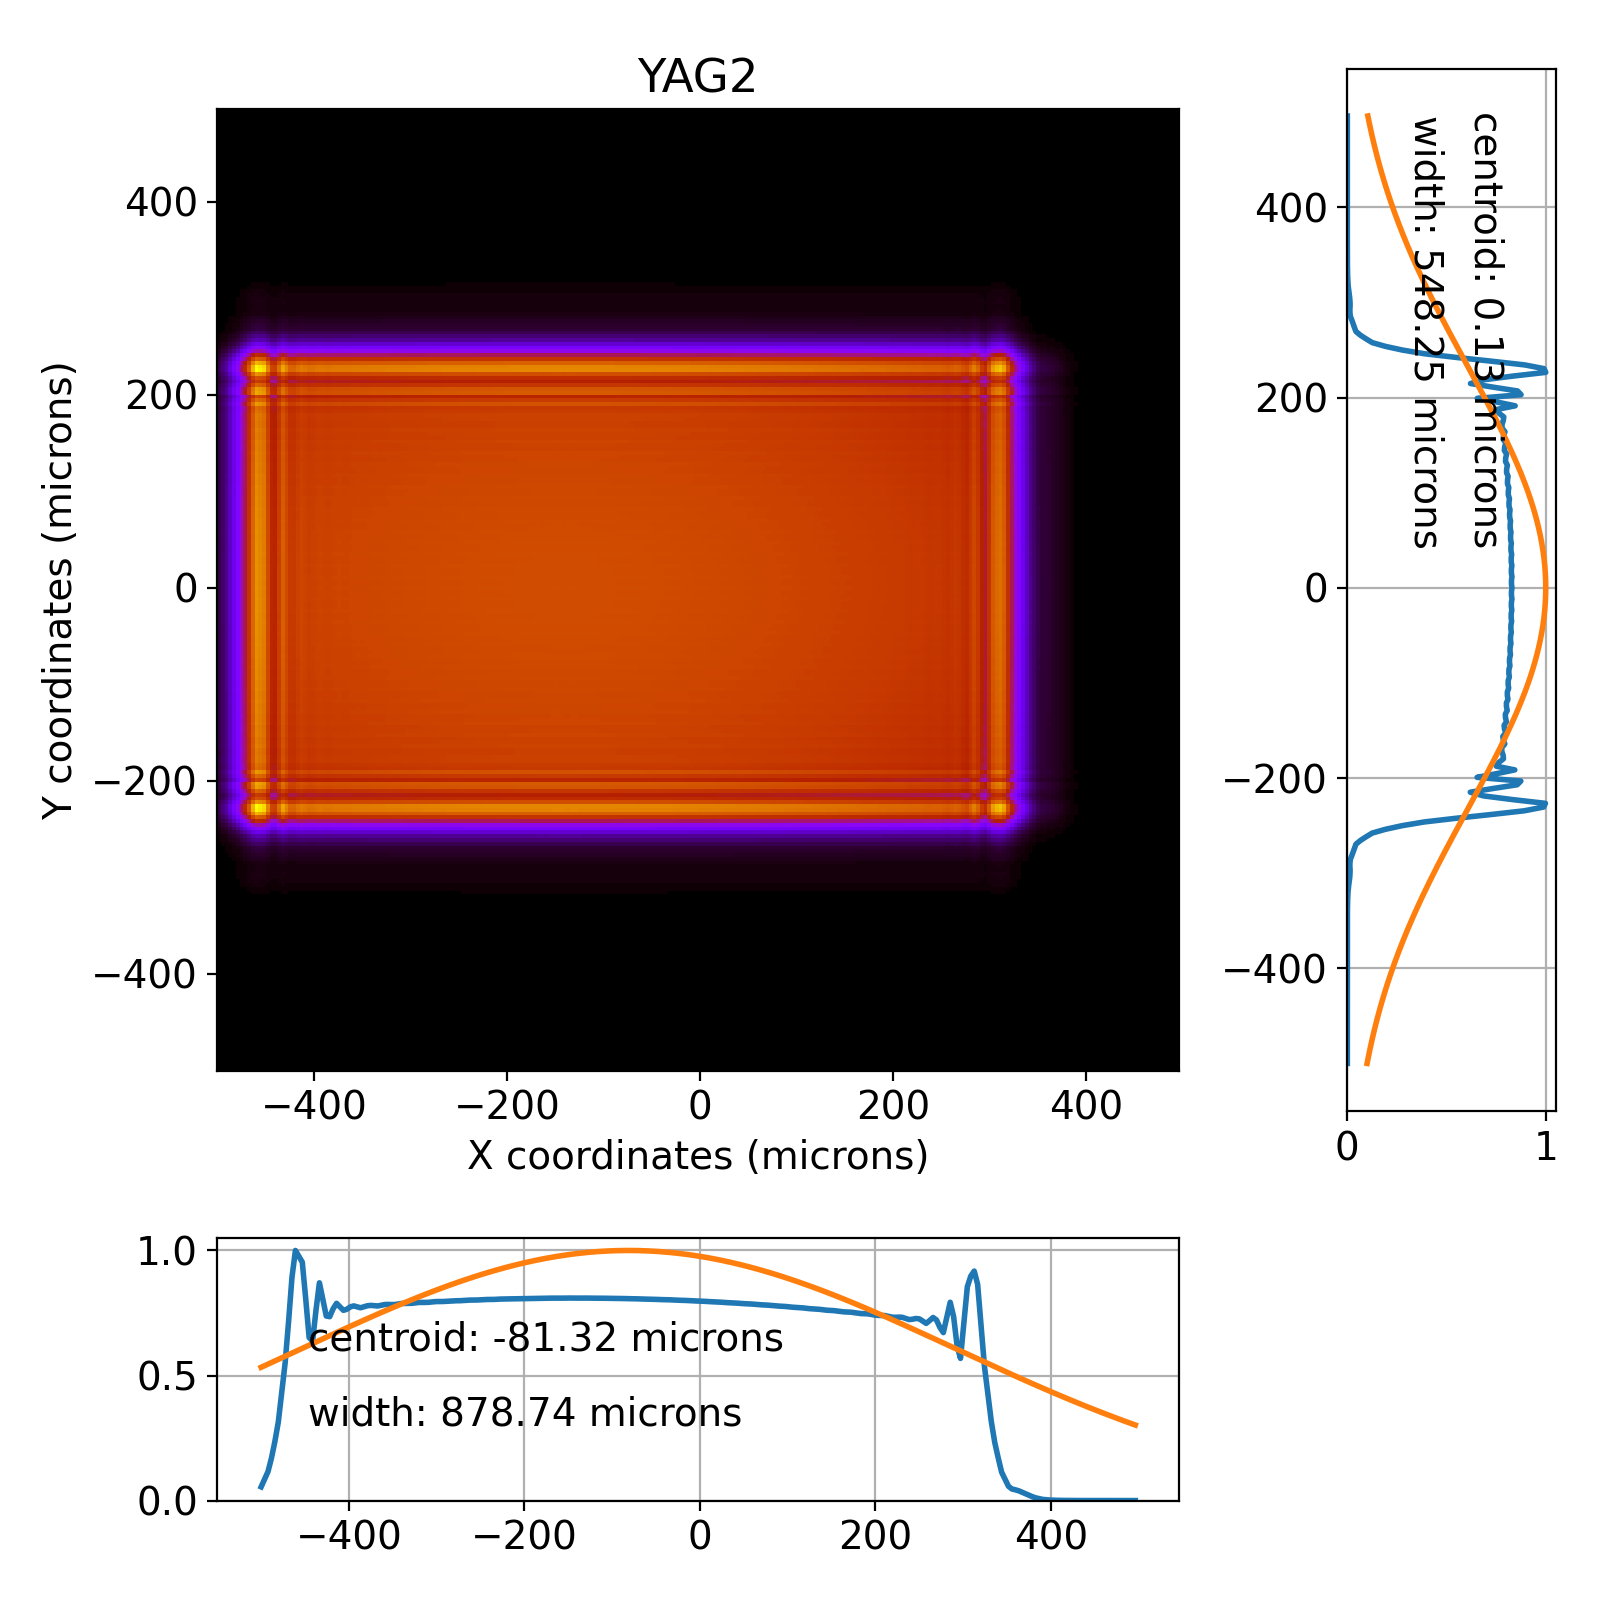

<IPython.core.display.Javascript object>


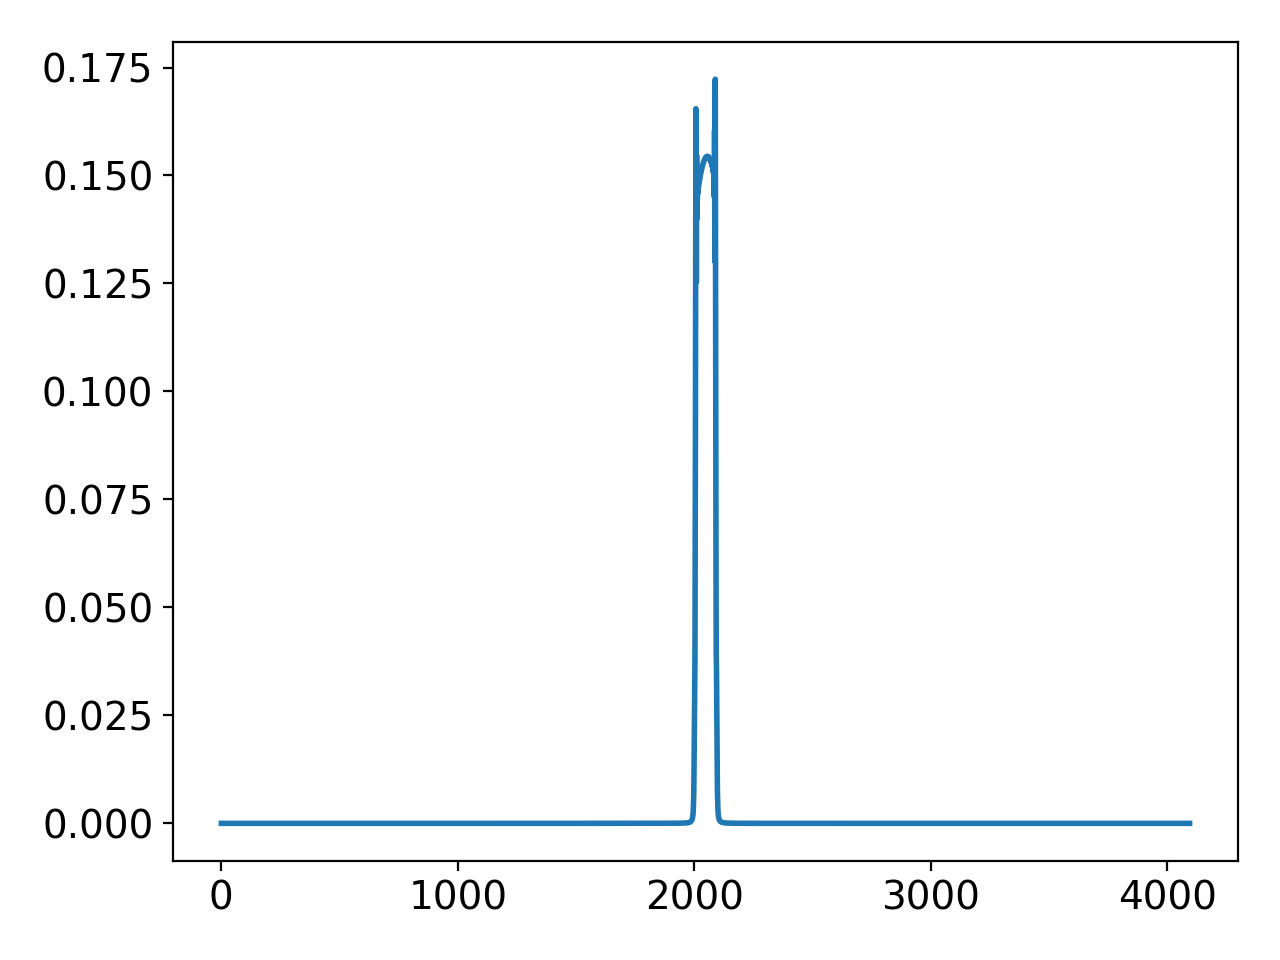

In [80]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [81]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=500)

In [82]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1','YAG2'])

FWHM in x: 359.9976963997878 microns
FWHM in y: 359.9976963997878 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414916889636518
5.414916889636518
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.91
zy: 360.01
azimuth 693.57 mrad
drift5
delta z: 122.60
zx: 972.25
zy: 365.36
azimuth 693.57 mrad
YAG2
zx: 972.25
zy: 365.36
azimuth 693.57 mrad
FWHM in x: 359.99738107427964 microns
FWHM in y: 359.99738107427964 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414921644112859
5.414921644112859
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.0

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.90
zy: 360.01
azimuth 693.57 mrad
drift5
delta z: -0.55
zx: 972.25
zy: 365.36
azimuth 693.57 mrad
YAG2
zx: 972.25
zy: 365.36
azimuth 693.57 mrad
FWHM in x: 359.9935972114246 microns
FWHM in y: 359.9935972114246 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414978697828952
5.414978697828952
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.89
zy: 360.01
azimuth 693.57 mrad
drift5
delta z: -0.55
zx: 972.24
zy: 365.36
azimuth 693.57 mrad
YAG2
zx: 972.24
zy: 365.36
azimuth 693.57 mrad
FWHM in x: 359.9882368757019 microns
FWHM in y: 359.9882368757019 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415059523926746
5.415059523926746
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy

delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.89
zy: 360.01
azimuth 693.57 mrad
drift5
delta z: -0.55
zx: 972.23
zy: 365.36
azimuth 693.57 mrad
YAG2
zx: 972.23
zy: 365.36
azimuth 693.57 mrad
FWHM in x: 359.9847685085469 microns
FWHM in y: 359.9847685085469 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415111823166497
5.415111823166497
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.88
zy: 360.01
azimuth 693.57 mrad
drift5
delta z: -0.55
zx: 972.23
zy: 365.36
azimuth 693.57 mrad
YAG2
zx: 972.23
zy: 365.36
azimuth 693.57 mrad
FWHM in x: 359.98098491178615 microns
FWHM in y: 359.98098491178615 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415168876882588
5.415168876882588
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00


zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.87
zy: 360.01
azimuth 693.57 mrad
drift5
delta z: -0.55
zx: 972.22
zy: 365.36
azimuth 693.57 mrad
YAG2
zx: 972.22
zy: 365.36
azimuth 693.57 mrad
FWHM in x: 359.9772013948482 microns
FWHM in y: 359.9772013948482 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4152259305986785
5.4152259305986785
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.87
zy: 360.01


zx: 972.22
zy: 365.36
azimuth 693.57 mrad
FWHM in x: 359.9734179577303 microns
FWHM in y: 359.9734179577303 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415282984314772
5.415282984314772
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.87
zy: 360.01
azimuth 693.57 mrad
drift5
delta z: -0.55
zx: 972.22
zy: 365.36
azimuth 693.57 mrad
YAG2
zx: 972.22
zy: 365.36
azimuth 693.57 mrad
FWHM in x: 359.97310267490695 microns
FWHM in y: 359.97310267490695 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415287738791111
5.415287738791111
mr1l0
zx: 110.00
zy: 110

zx: 966.86
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.21
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.21
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.9696346004304 microns
FWHM in y: 359.9696346004304 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4153400380308625
5.4153400380308625
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.86
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.21
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.21
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.9693193242582 microns
FWHM in y: 359.9693193242582 microns
FWHM Dive

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.86
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.20
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.20
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.96585132294564 microns
FWHM in y: 359.96585132294564 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415397091746954
5.415397091746954
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 3

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.85
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.20
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.20
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.96238338869784 microns
FWHM in y: 359.96238338869784 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415449390986704
5.415449390986704
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.85
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.20
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.20
zy: 365.

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.84
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.19
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.19
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.95891552151306 microns
FWHM in y: 359.95891552151306 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415501690226455
5.415501690226455
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.84
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.19
zy: 365.3

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.84
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.19
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.19
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.95513247015765 microns
FWHM in y: 359.95513247015765 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4155587439425465
5.4155587439425465
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.0

zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.83
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.18
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.18
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.95134949860784 microns
FWHM in y: 359.95134949860784 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415615797658638
5.415615797658638
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.83
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.18
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.18
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.951034254581 microns
FWH

zx: 966.83
zy: 360.01
azimuth 693.56 mrad
drift5
delta z: -0.55
zx: 972.17
zy: 365.36
azimuth 693.56 mrad
YAG2
zx: 972.17
zy: 365.36
azimuth 693.56 mrad
FWHM in x: 359.94725136948426 microns
FWHM in y: 359.94725136948426 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41567760585107
5.41567760585107
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.82
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -0.55
zx: 972.17
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.17
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.9469361326617 microns
FWHM in y: 359.9469361326617 microns
FWHM Diverg

zx: 966.82
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -0.55
zx: 972.17
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.17
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.9431533340153 microns
FWHM in y: 359.9431533340153 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415739414043501
5.415739414043501
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.82
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -0.55
zx: 972.17
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.17
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.9428381043967 microns
FWHM in y: 359.9428381043967 microns
FWHM Diverg

zx: 972.16
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.16
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.9390553921973 microns
FWHM in y: 359.9390553921973 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415801222235936
5.415801222235936
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.81
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -0.55
zx: 972.16
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.16
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.93874016978265 microns
FWHM in y: 359.93874016978265 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41580597671

zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.81
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -0.55
zx: 972.15
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.15
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.9349575440277 microns
FWHM in y: 359.9349575440277 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415863030428367
5.415863030428367
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.80
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -0.55
zx: 972.15
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.15
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.93464232881666 microns
FWH

zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.80
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -0.55
zx: 972.15
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.15
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.930859789503 microns
FWHM in y: 359.930859789503 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415924838620799
5.415924838620799
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.01
zy: 360.01
azimuth -0.00 mrad
c2
zx: 966.80
zy: 360.01
azimuth 693.55 mrad
drift5
delta z: -0.55
zx: 972.15
zy: 365.36
azimuth 693.55 mrad
YAG2
zx: 972.15
zy: 365.36
azimuth 693.55 mrad
FWHM in x: 359.9305445814951 microns
FWHM i

In [53]:
(85+20)/134

0.7835820895522388

<IPython.core.display.Javascript object>


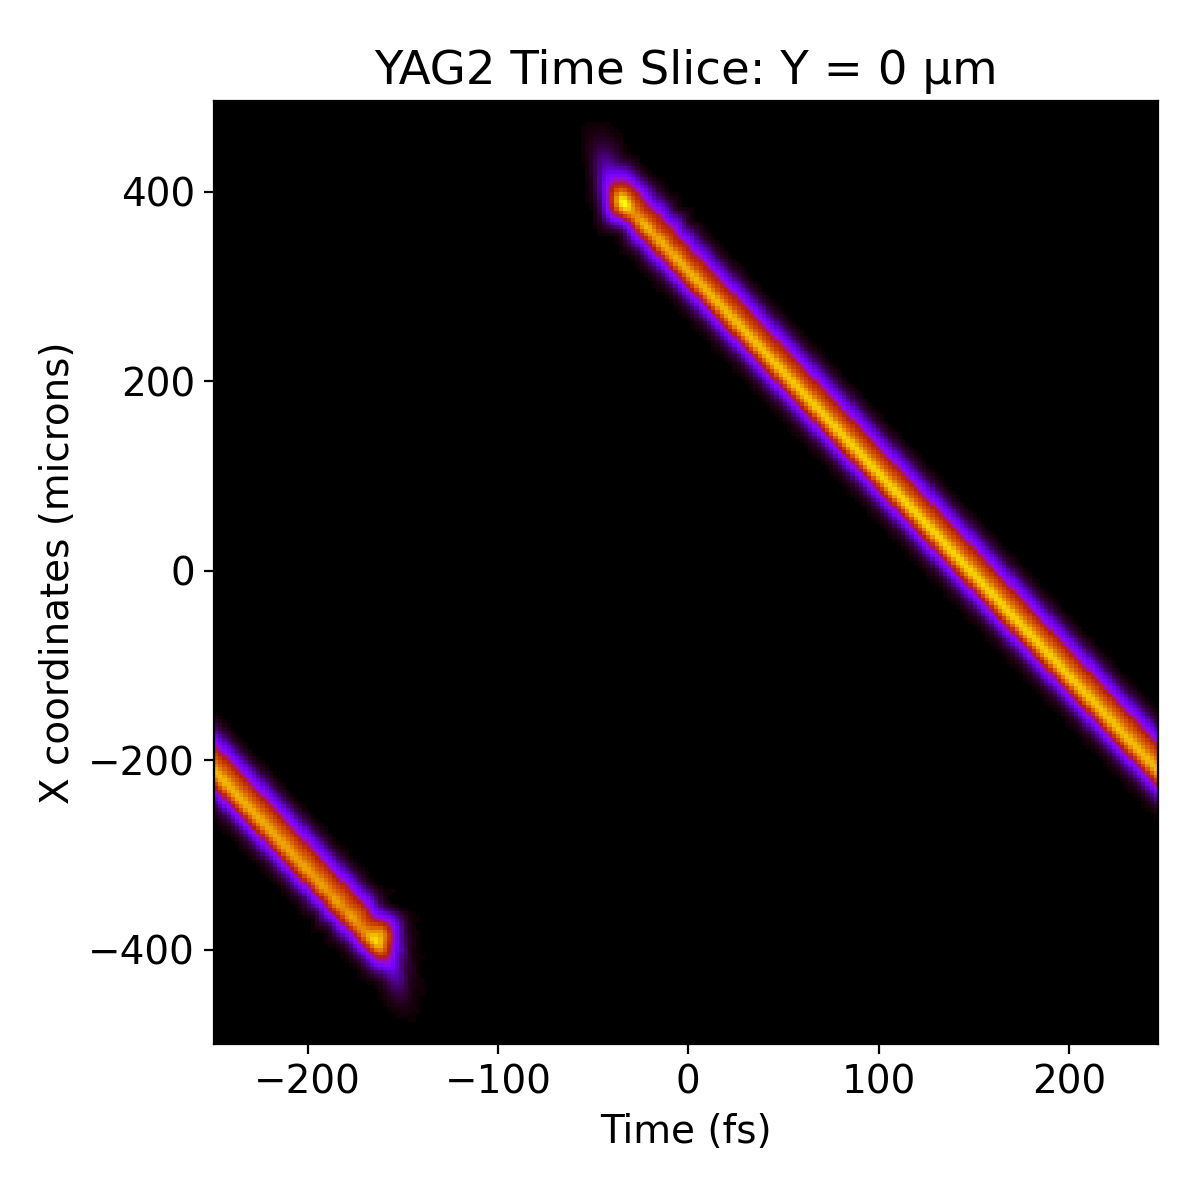

128


<IPython.core.display.Javascript object>


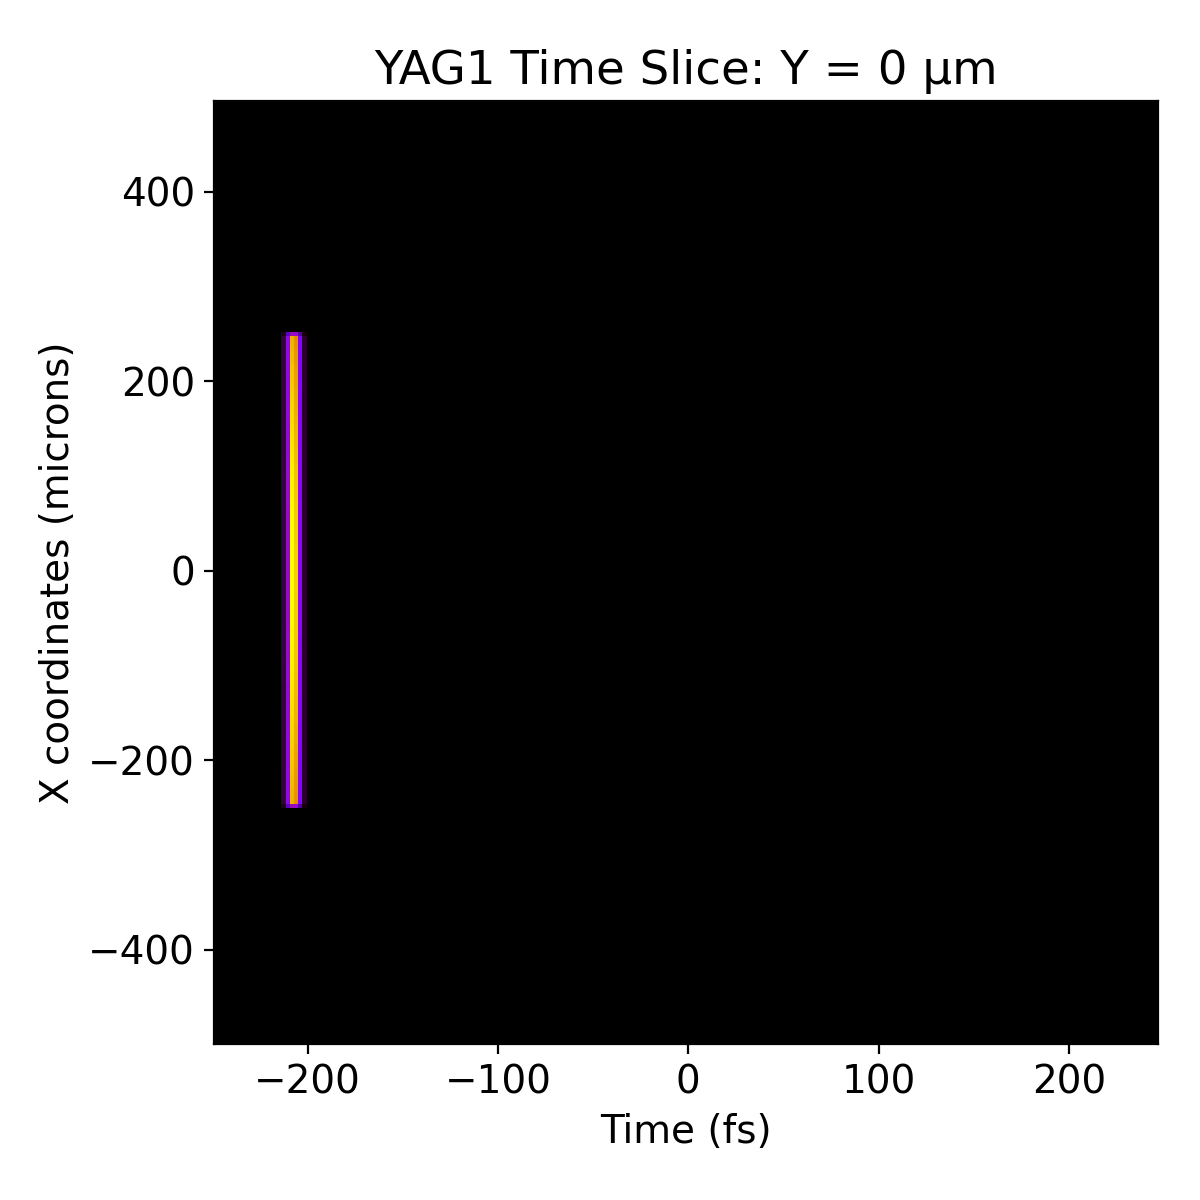

128


<IPython.core.display.Javascript object>


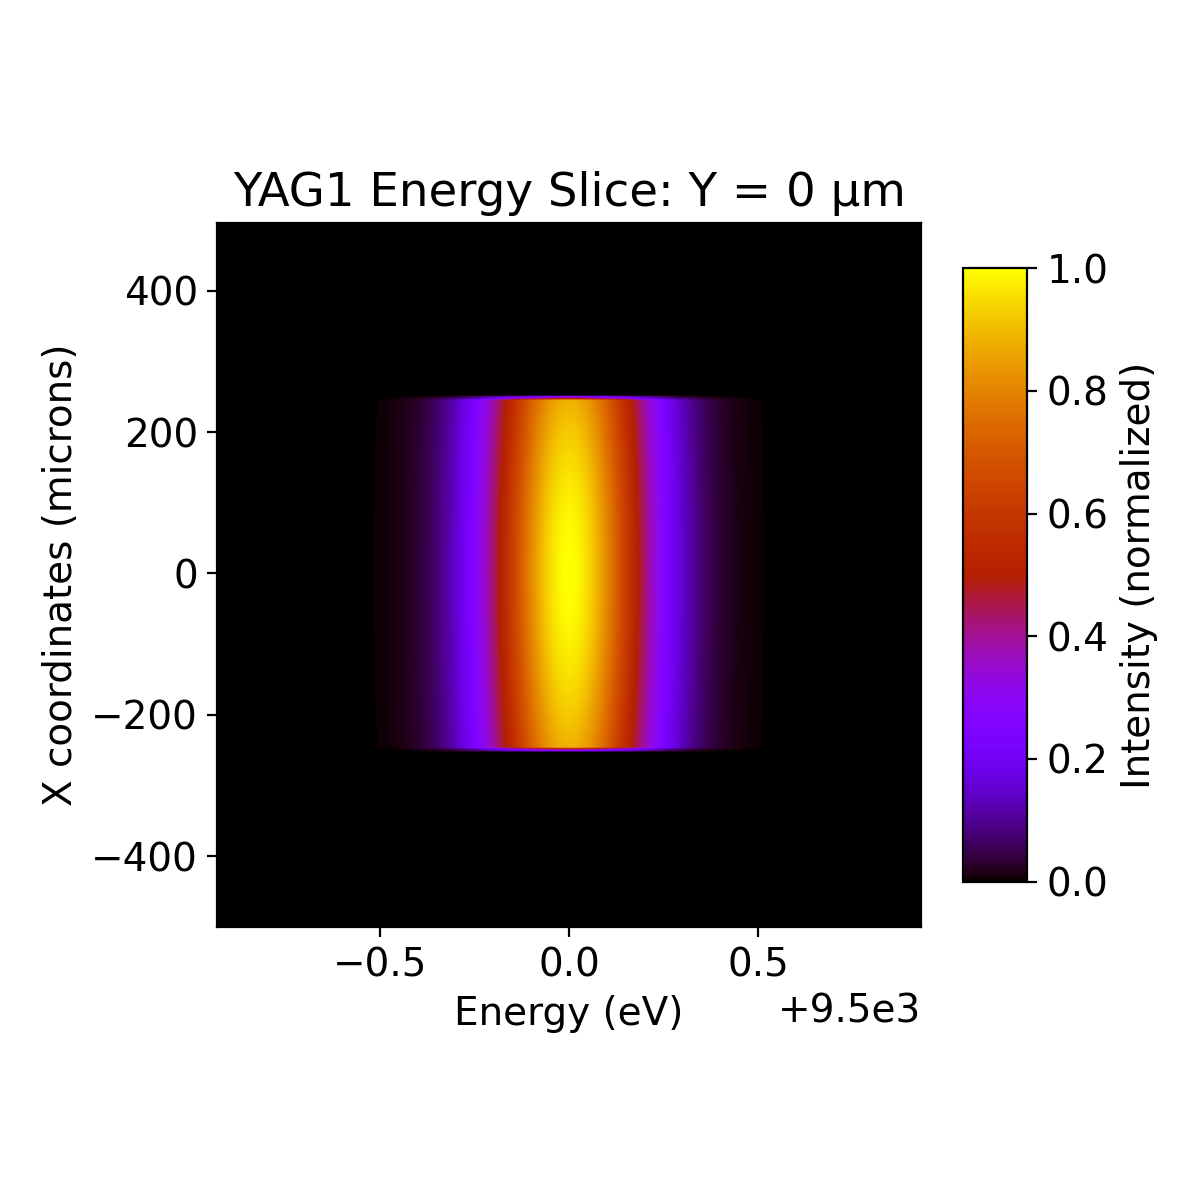

<IPython.core.display.Javascript object>


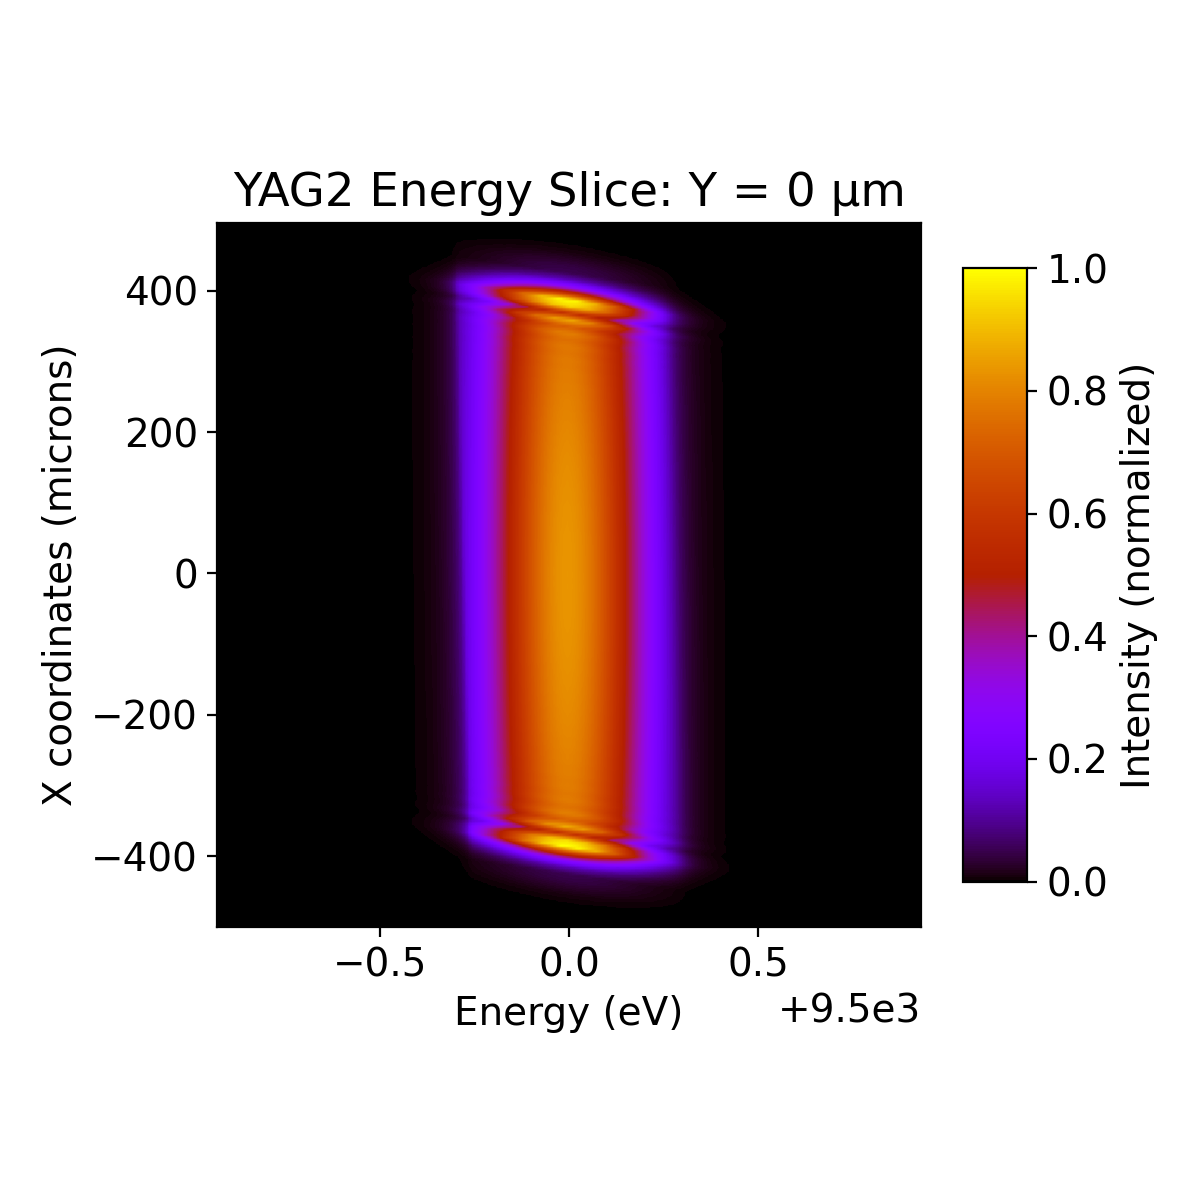

<IPython.core.display.Javascript object>


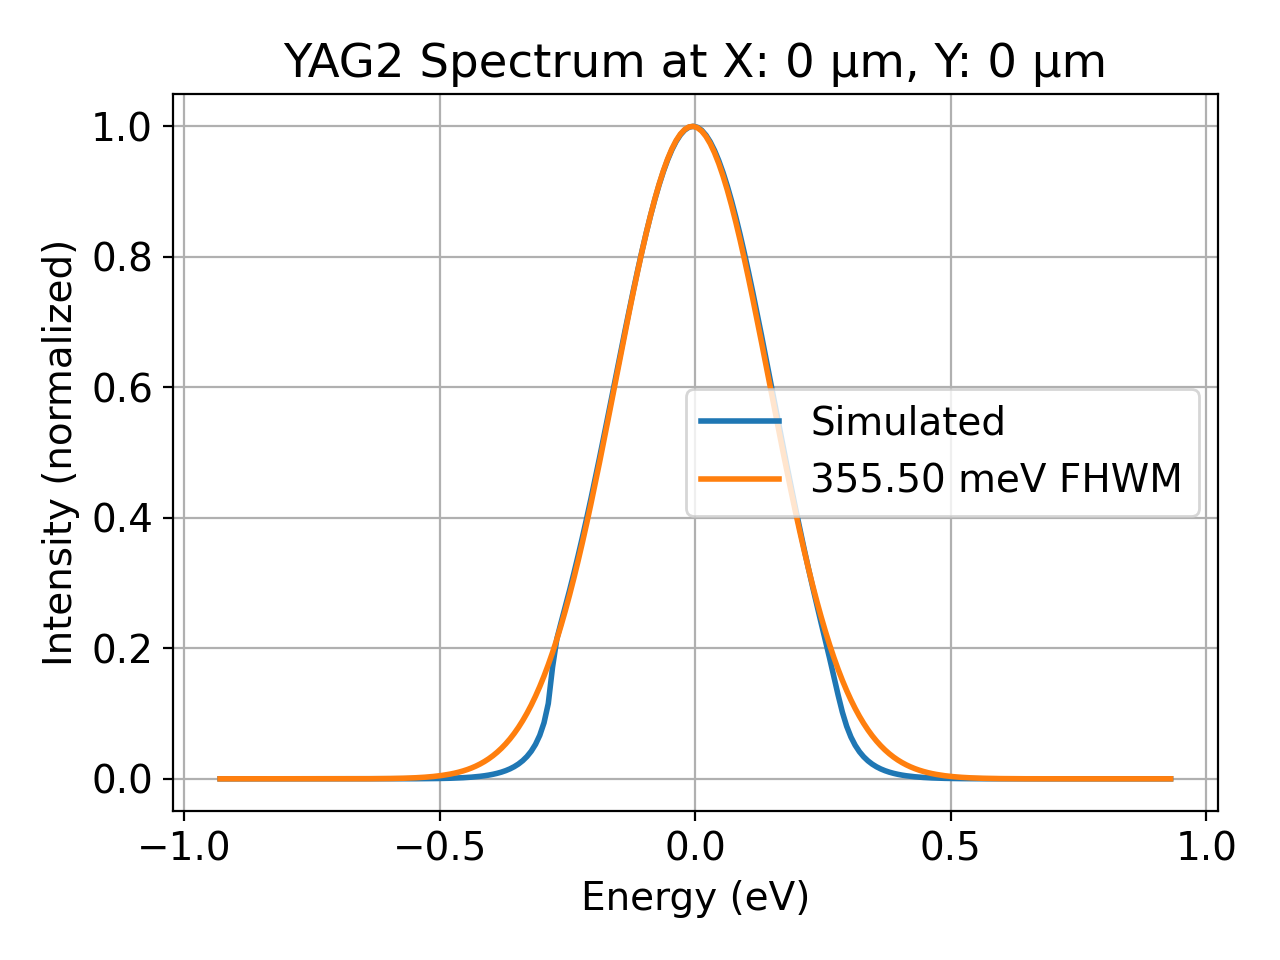

<IPython.core.display.Javascript object>


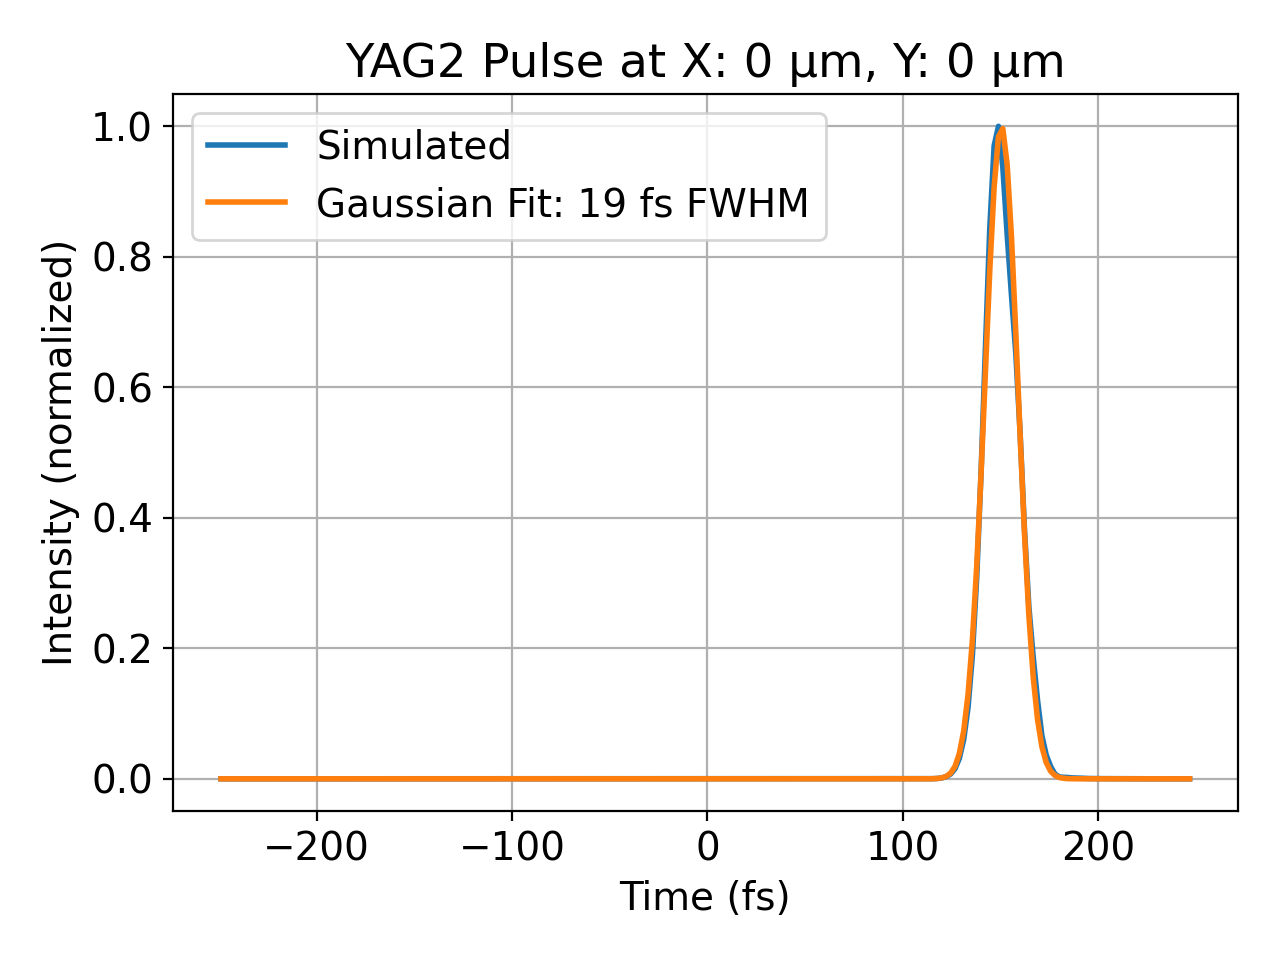

<IPython.core.display.Javascript object>


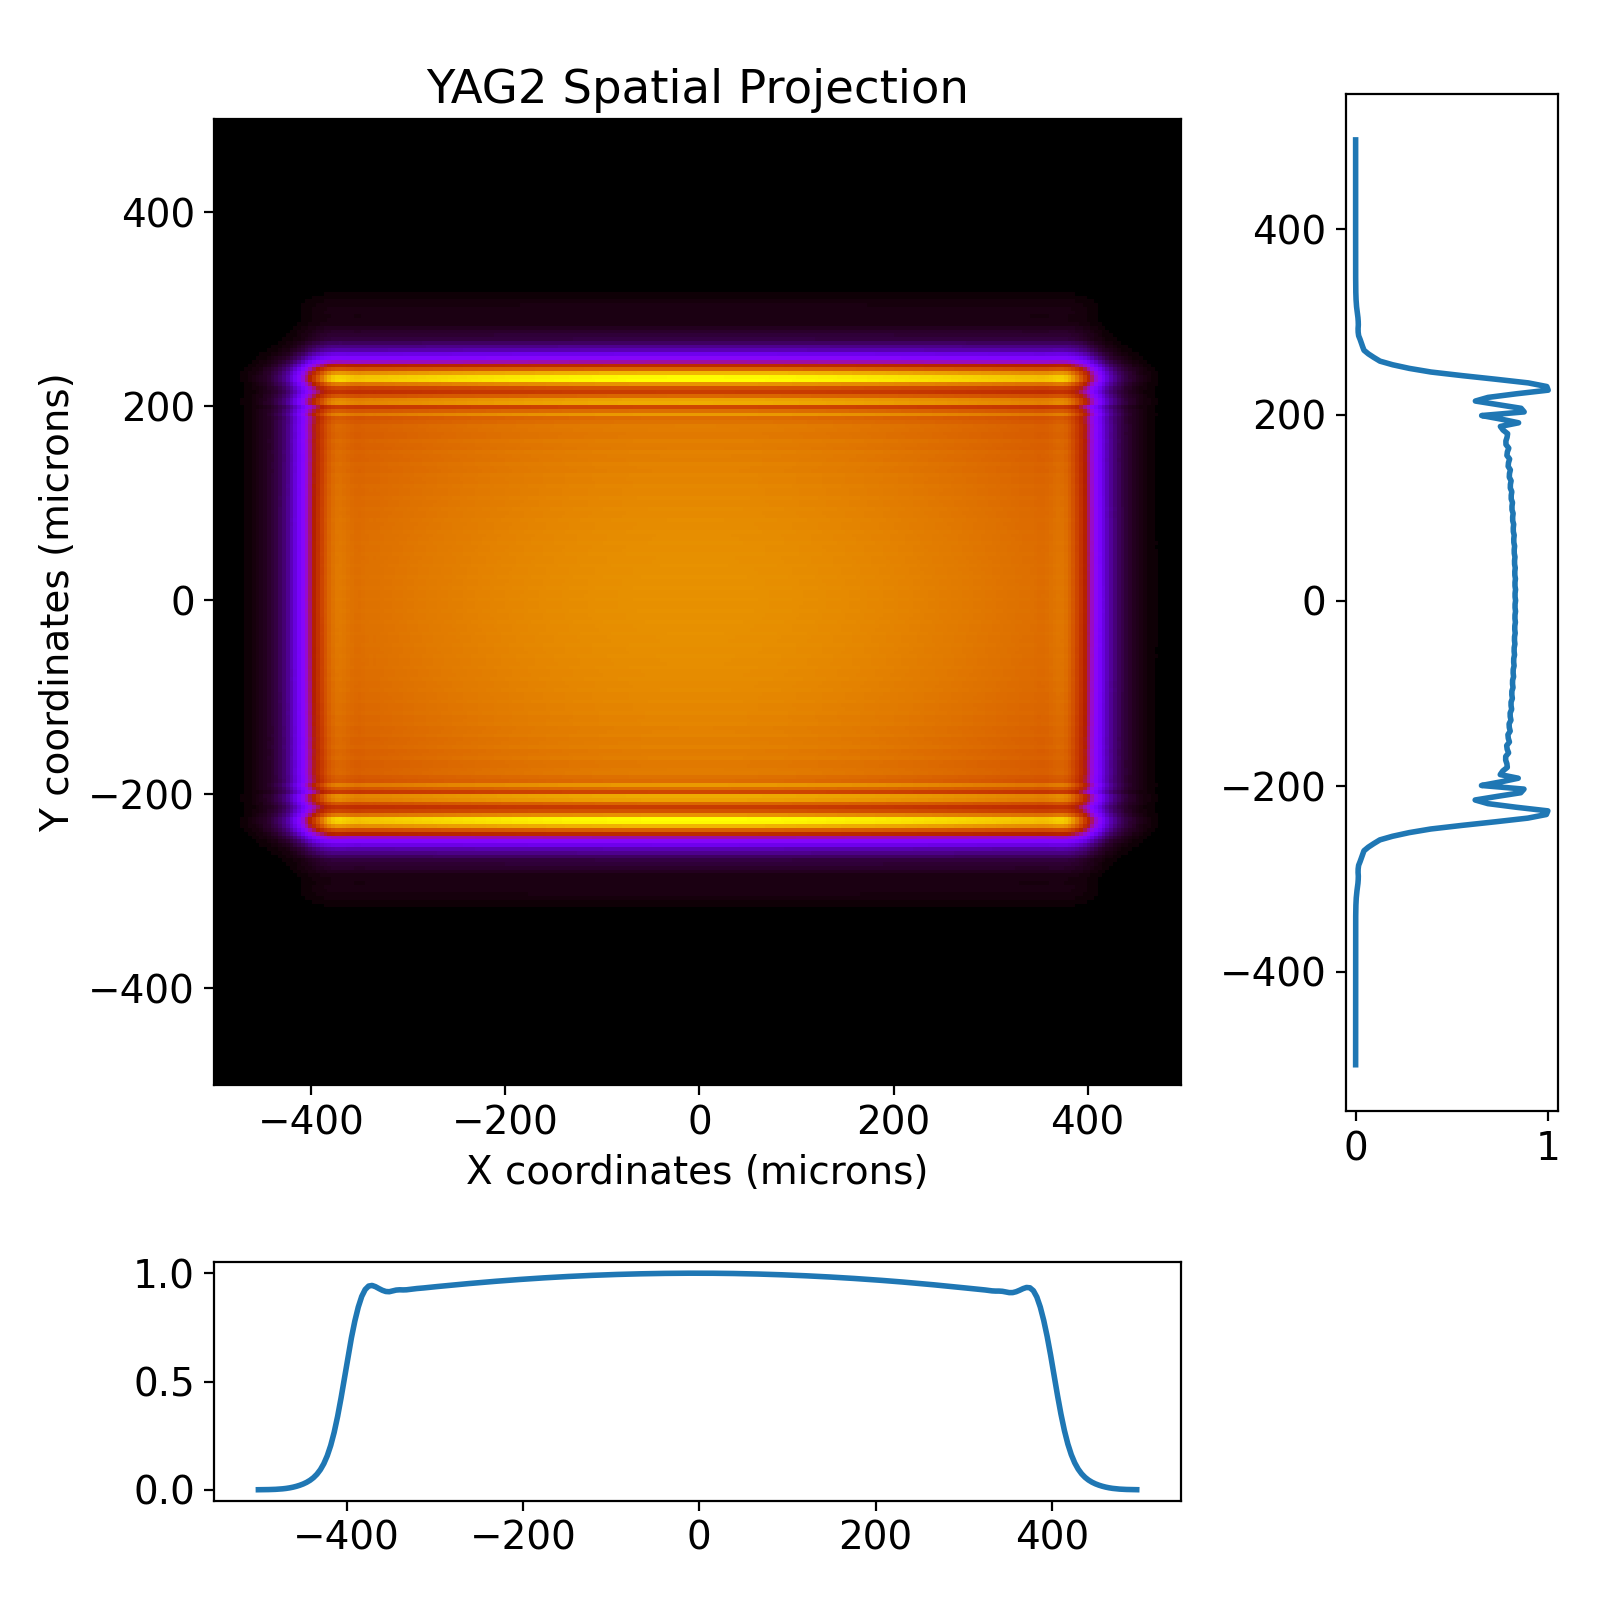

In [83]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')

pulse_test.imshow_time_slice('YAG2')
pulse_test.imshow_time_slice('YAG1')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
pulse_test.imshow_projection('YAG2')


<IPython.core.display.Javascript object>


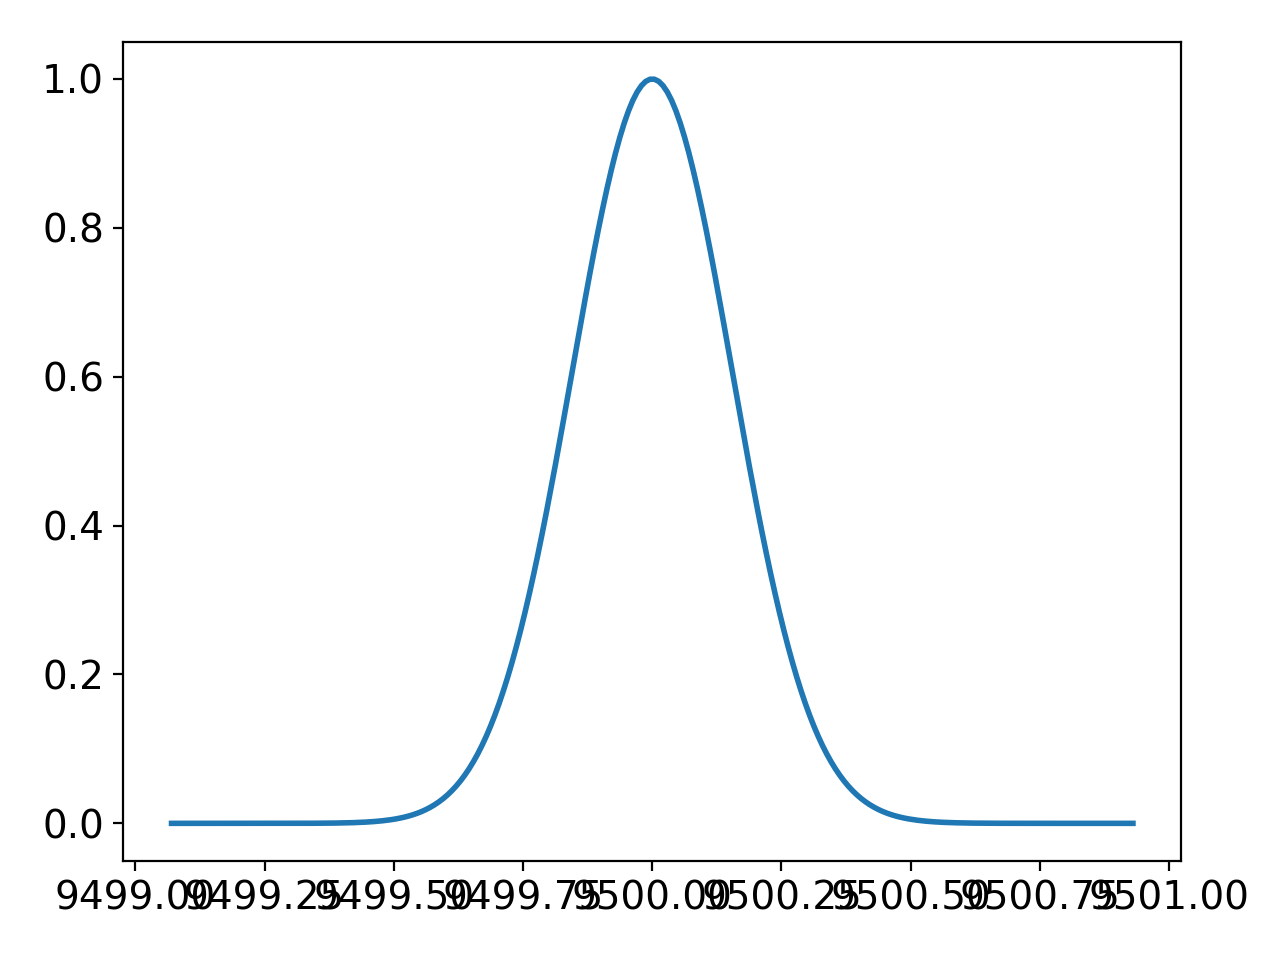

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8

In [55]:
700*180*(1239.8/1150*1e-9)/3e8*1e15

452.7965217391304

In [69]:
tilt1 = (1/2.2e-3*500/np.sin(crystal2.alpha))*(1239.8/9500*1e-9)/3e8*1e15
tilt2 = (1/2.2e-3*500/np.sin(crystal2.beta0)/1.64)*(1239.8/9500*1e-9)/3e8*1e15
print(tilt1)
print(tilt2)

235.09455590982552
234.9153748124694


In [64]:
alphaAsym = 5*np.pi/180
bragg = crystal2.crystal.get_Bragg_angle(9500)
2*np.sin(alphaAsym)*np.sin(bragg)/3e8/np.sin(bragg+alphaAsym)*500e-6*1e15

234.7859996714003

In [65]:
(1/2.2e-3*500/np.sin(crystal2.alpha)/1.64)*(1239.8/9500*1e-9)/3e8*1e15

143.3503389694058

In [68]:
alphaAsym = 5*np.pi/180
delta = 0
roll = 0
lambda0 = 1239.8/9500*1e-9

# figure out mirror vectors:
mirror_x0 = np.array([1, 0, 0], dtype=float)
mirror_y0 = np.array([0, 1, 0], dtype=float)
mirror_z0 = np.array([0, 0, 1], dtype=float)

# crystal plane normal vector
c_x = np.cos(alphaAsym)
c_z = np.sin(alphaAsym)

# vector parallel to crystal plane, in xz plane
crystal_x = np.sin(alphaAsym)
crystal_z = np.cos(alphaAsym)

c_normal0 = np.array([c_x, 0, c_z], dtype=float)


np.dot(c_normal0, mirror_z0) * mirror_z0 * lambda0/crystal1.d

array([0.        , 0.        , 0.05923897])

In [69]:
lambda0/(crystal1.d /np.sin(alphaAsym))

0.05923896674594244